In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
## files.upload()
apple_training_complete = pd.read_csv(r'AAPL.csv')
apple_training_processed = apple_training_complete.iloc[:, 1:2].values


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)
features_set = []
labels = []
for i in range(60, 1259):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set,
                         (features_set.shape[0], features_set.shape[1], 1))

In [5]:
features_set[0]
labels[0]

0.06437096524008729

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [11]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0032
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0035
Epoch 3/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0032
Epoch 4/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0037
Epoch 5/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0029
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0031
Epoch 8/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0030
Epoch 9/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0027
Epoch 10/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0028
Epoch 11/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0025
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0024
Epoch 13/100
38/38 [=

In [12]:
from google.colab import files
## files.upload()
apple_testing_complete = pd.read_csv(r'AAPL-Test.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

1/1 [==============================] - 0s 37ms/step


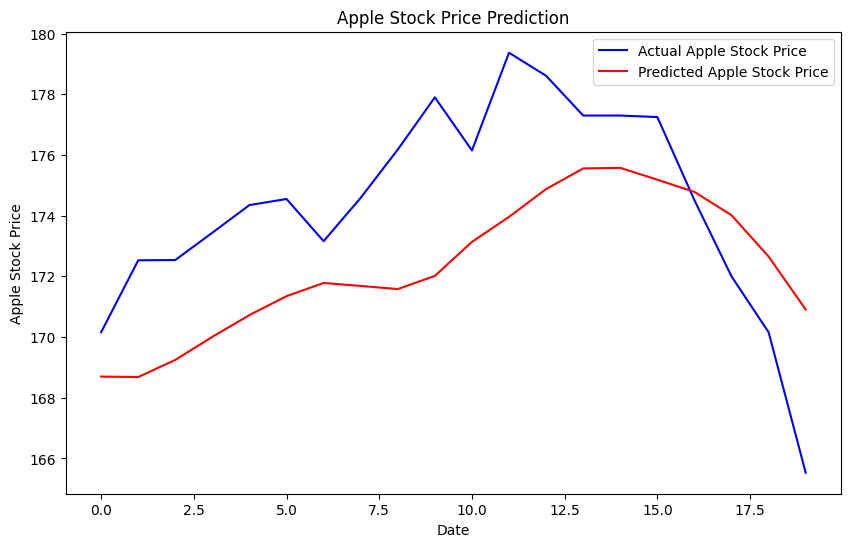

In [13]:
predictions = model.predict(test_features)
predictions = scaler.inverse_transform(predictions)
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()
